In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

: 

In [2]:
data = pd.read_csv("../data/bitcoin_data.csv", skiprows=2)
data.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

In [3]:
data.head()

,Date,Close,High,Low,Open,Volume
0,2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
1,2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2,2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
3,2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
4,2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


In [4]:
data.describe()

,Close,High,Low,Open,Volume
count,1916.000000,1916.000000,1916.000000,1916.000000,1.916000e+03
mean,38974.187982,39780.282120,38048.337751,38937.255062,3.369732e+10
std,23933.195178,24423.990946,23382.653499,23925.180293,1.986761e+10
min,4970.788086,5331.833984,4106.980957,5002.578125,5.331173e+09
25%,20180.612305,20523.783691,19696.081055,20162.276855,2.075331e+10
50%,34665.109375,35495.093750,33517.386719,34658.189453,3.020112e+10
75%,56316.095703,57901.187500,54479.529297,56331.904297,4.083442e+10
max,106146.265625,109114.882812,105291.734375,106147.296875,3.509679e+11


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1916 non-null   object 
 1   Close   1916 non-null   float64
 2   High    1916 non-null   float64
 3   Low     1916 non-null   float64
 4   Open    1916 non-null   float64
 5   Volume  1916 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 89.9+ KB


In [6]:
data.shape

(1916, 6)

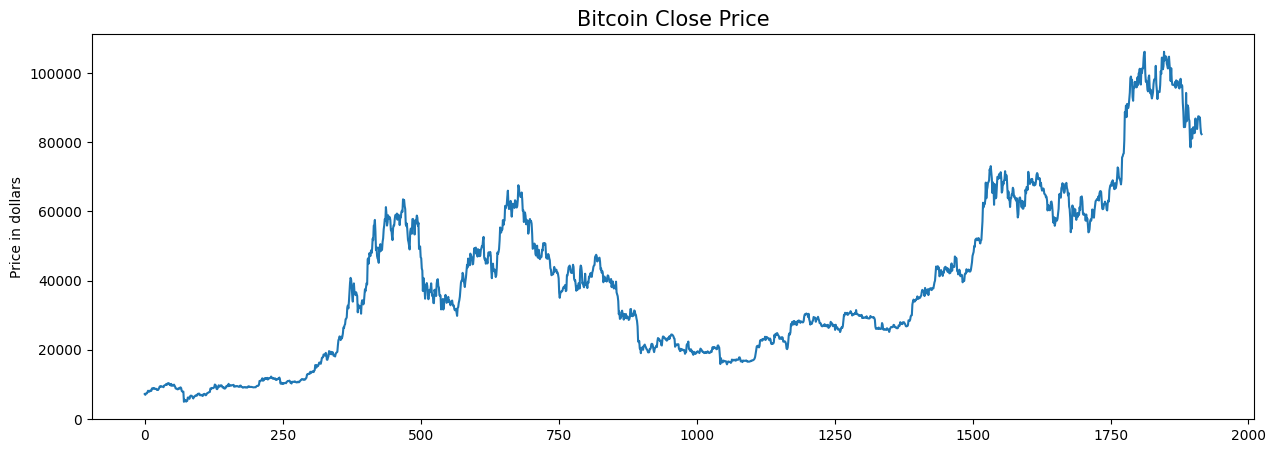

In [7]:
# Closing price over time.
plt.figure(figsize=(15, 5))
plt.plot(data['Close'])
plt.title('Bitcoin Close Price', fontsize=15)
plt.ylabel('Price in dollars')
plt.show()

In [8]:
# Check null values 
data.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

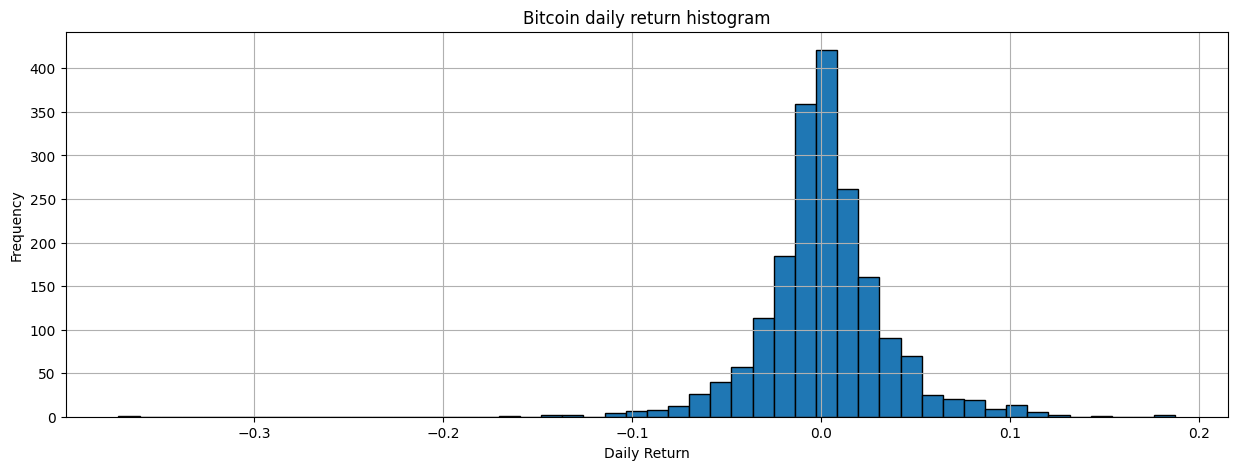

In [9]:
# Daily returns histogram
data["Daily Return"] = data["Close"].pct_change()

plt.figure(figsize=(15, 5))
data["Daily Return"].hist(bins=50, edgecolor="black")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.title("Bitcoin daily return histogram")
plt.grid(True)
plt.show()

In [10]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

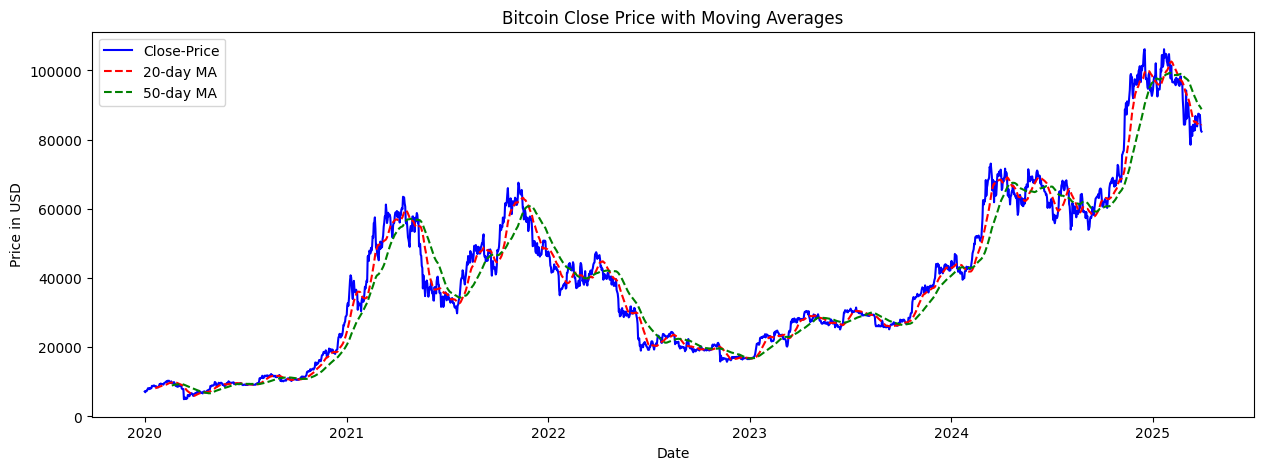

In [11]:
# Moving Average 

# Calculate moving averages
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

plt.figure(figsize=(15, 5))
plt.plot(data.index, data['Close'], label="Close-Price", color="blue")
plt.plot(data.index, data['MA20'], label='20-day MA', color="red", linestyle="--")
plt.plot(data.index, data['MA50'], label="50-day MA", color="green", linestyle="--")

plt.title('Bitcoin Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

In [12]:
# Mean & Volatility

mean_return = data['Daily Return'].mean()
volatility = data["Daily Return"].std()

annualized_return = mean_return * 365
annualized_volatility = volatility * (365 ** 0.5)

print(f"Mean Daily Return: {mean_return:.4f}")
print(f"Daily Volatility: {volatility:.4f}")
print(f"Annualized Return: {annualized_return:.4f}")
print(f"Annualized Volatility: {annualized_volatility:.4f}")

Mean Daily Return: 0.0018
Daily Volatility: 0.0333
Annualized Return: 0.6705
Annualized Volatility: 0.6358


In [13]:
# Sharpe ratio
# In finance, the Sharpe ratio (also known as the Sharpe index, the Sharpe measure, and the reward-to-variability ratio) 
# measures the performance of an investment such as a security or portfolio compared to a risk-free asset, 
# after adjusting for its risk.

sharpe_ratio = annualized_return/annualized_volatility
print(f"Sharpe ratio: {sharpe_ratio:.2f}")

# Sharpe Ratio = 1.05
# A Sharpe ratio > 1 is generally considered good,
# > 2 is very good,
# > 3 is excellent.

Sharpe ratio: 1.05


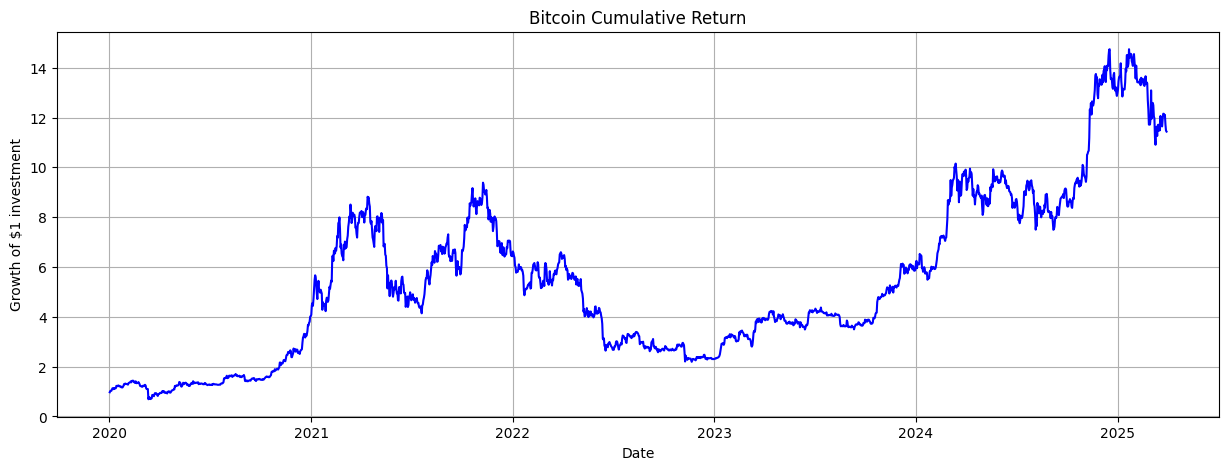

In [14]:
# Cumulative Returns
data['Cumulative Returns'] = (1 + data['Daily Return']).cumprod()

# Cumulative return measures the total percentage change in the value of an investment over a specific period. 
# It represents the overall growth of the investment without considering how long it took to achieve that growth. 
# Formula: Cumulative Return = (Ending Value−Beginning Value) / Beginning Value.

# Plot 
plt.figure(figsize=(15, 5))
plt.plot(data.index, data['Cumulative Returns'], color='blue')
plt.title('Bitcoin Cumulative Return')
plt.ylabel('Growth of $1 investment')
plt.xlabel('Date')
plt.grid(True)
plt.show()

Maximum Drawdown: -76.63%


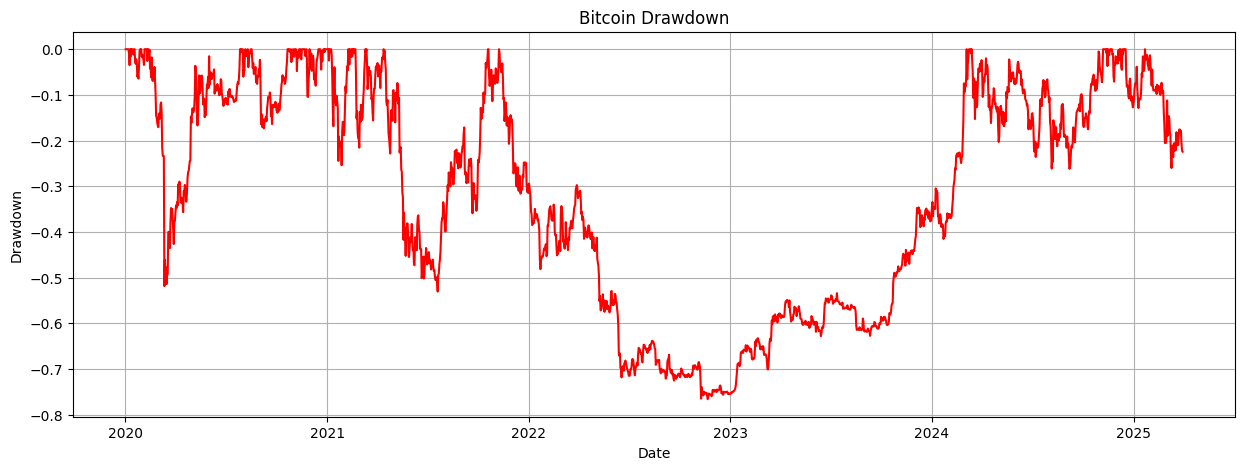

In [15]:
# Maximum Drawdown
# Maximum drawdown (MDD) is a key risk metric that represents the largest peak-to-trough decline in the value of an investment
# or portfolio over a specific period. It's expressed as a percentage and helps investors understand the potential downside
# risk of an investment.

# Calculate running maximum of cumulative return
running_max = data['Cumulative Returns'].cummax()

# DrawDown is how for we are from the running max
data['Drawdown'] = (data['Cumulative Returns'] - running_max) / running_max

# Maximum Drawdown value
max_drawdown = data['Drawdown'].min()

print(f"Maximum Drawdown: {max_drawdown:.2%}")

# Plot drawdown 
plt.figure(figsize=(15, 5))
plt.plot(data.index, data['Drawdown'], color='red')
plt.title('Bitcoin Drawdown')
plt.ylabel('Drawdown')
plt.xlabel('Date')
plt.grid(True)
plt.show()


In [16]:
print(data['Drawdown'])

Date
2020-01-01         NaN
2020-01-02    0.000000
2020-01-03    0.000000
2020-01-04    0.000000
2020-01-05    0.000000
                ...   
2025-03-26   -0.181310
2025-03-27   -0.178708
2025-03-28   -0.205312
2025-03-29   -0.221851
2025-03-30   -0.224330
Name: Drawdown, Length: 1916, dtype: float64


In [ ]:
# Testing for stationarity
